# Машинное обучение

# Описание проекта
# Задача
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;

сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

# Инструкция по выполнению проекта

Шаг 1. Загрузим данные

Шаг 2. Проведём исследовательский анализ данных (EDA)

Шаг 3. Построим модель прогнозирования оттока клиентов

Шаг 4. Сделаем кластеризацию клиентов

Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами

Сформулируем основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.


# Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

## Загрузим данные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from plotly import graph_objects as go
import plotly.express as px 
from scipy import stats as st
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.shape

(4000, 14)

In [4]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
data.duplicated().sum()

0

### Вывод:
Нам представлен датасет, в котором 4000 строк

Представленные типы данных: float64(4), int64(10)

Размер: 437.6 KB

Пропусков не обнаружено.

Дубликатов не обнаружено.

## Проведём исследовательский анализ данных (EDA)

Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [8]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Отсутствующих признаков не обнаружено. 

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
data.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


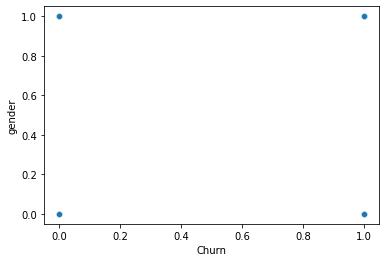

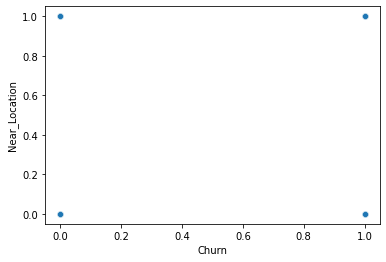

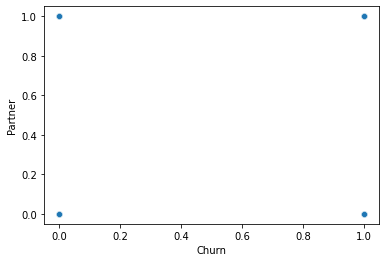

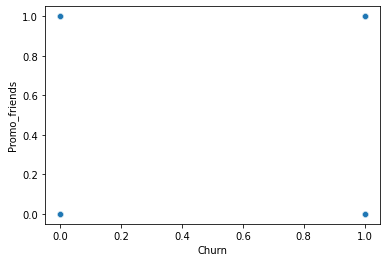

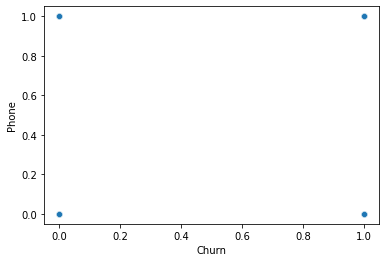

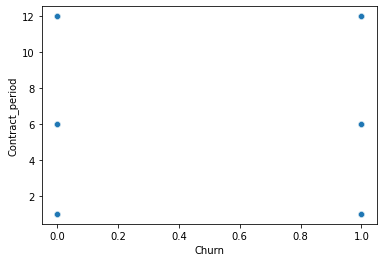

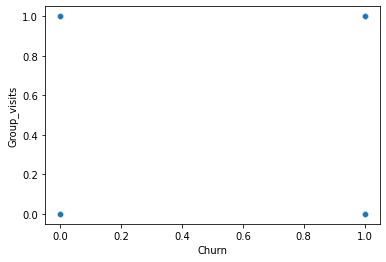

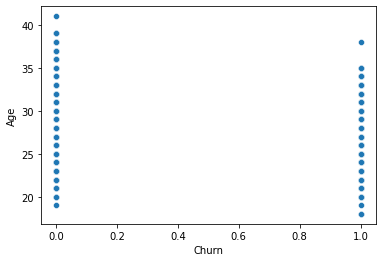

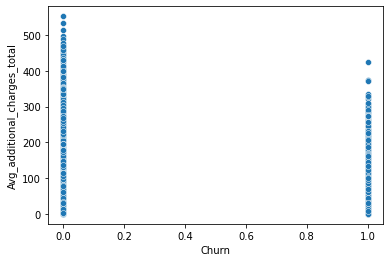

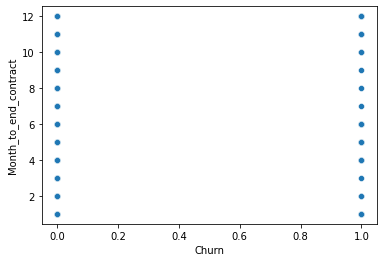

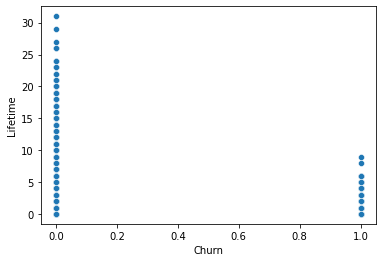

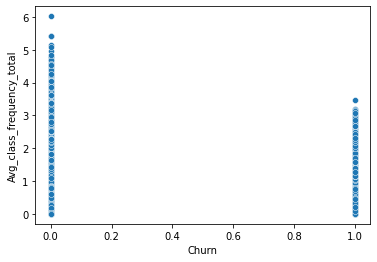

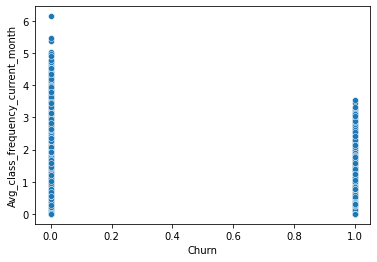

In [10]:
for col in data.drop('Churn', axis = 1).columns:
    sns.scatterplot(x=data['Churn'], y=data[col]) #ваш код здесь
    plt.show()

Перекосов по диаграмме рассеяния не наблюдается, значит на этих данных можно строить модель.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

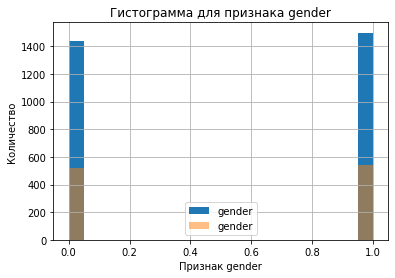

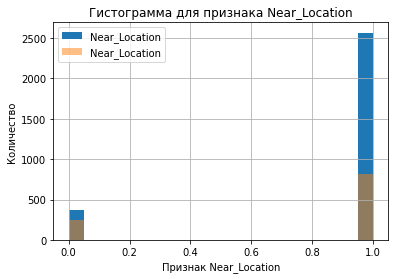

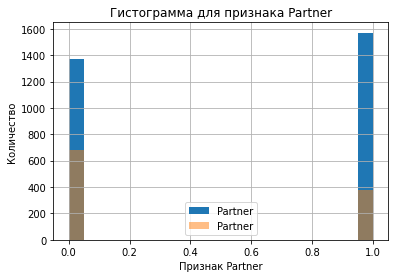

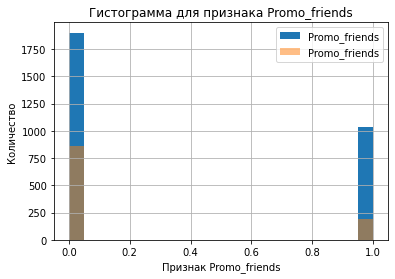

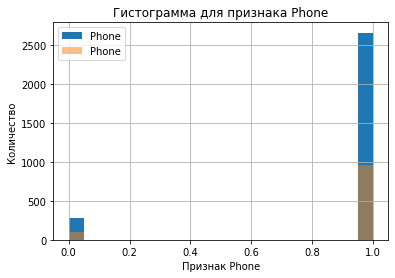

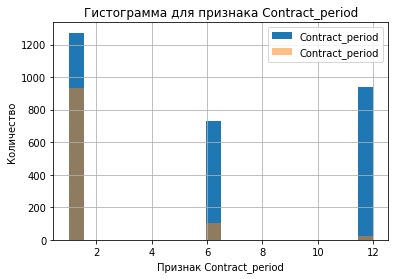

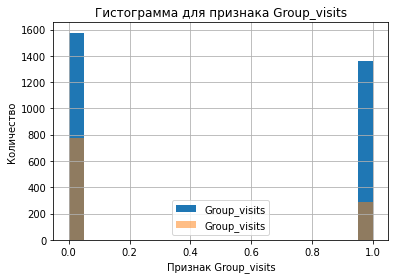

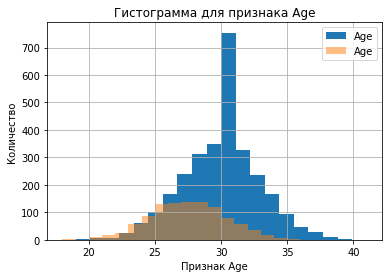

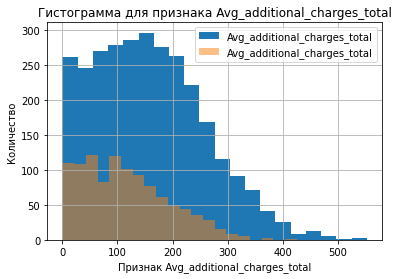

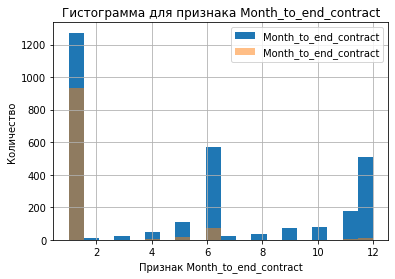

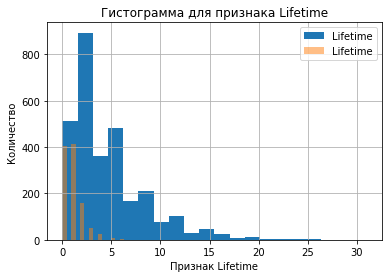

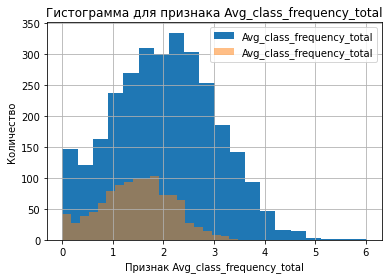

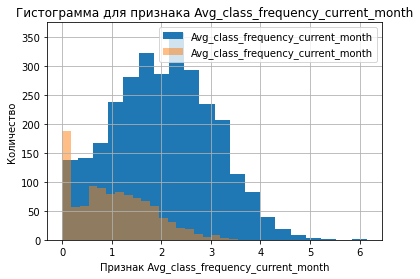

In [12]:
for col in data.drop('Churn', axis=1).columns:
    data.query('Churn ==0')[col].hist(legend = True, bins = 20)
    ax = data.query('Churn == 1')[col].hist(legend = True, bins = 20, alpha = 0.5)
    plt.title(f'Гистограмма для признака {col}')
    plt.xlabel(f'Признак {col}')
    plt.ylabel('Количество')
    plt.show()

Построим матрицу корреляций и отобразим её.

In [13]:
corr = data.corr()
corr

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


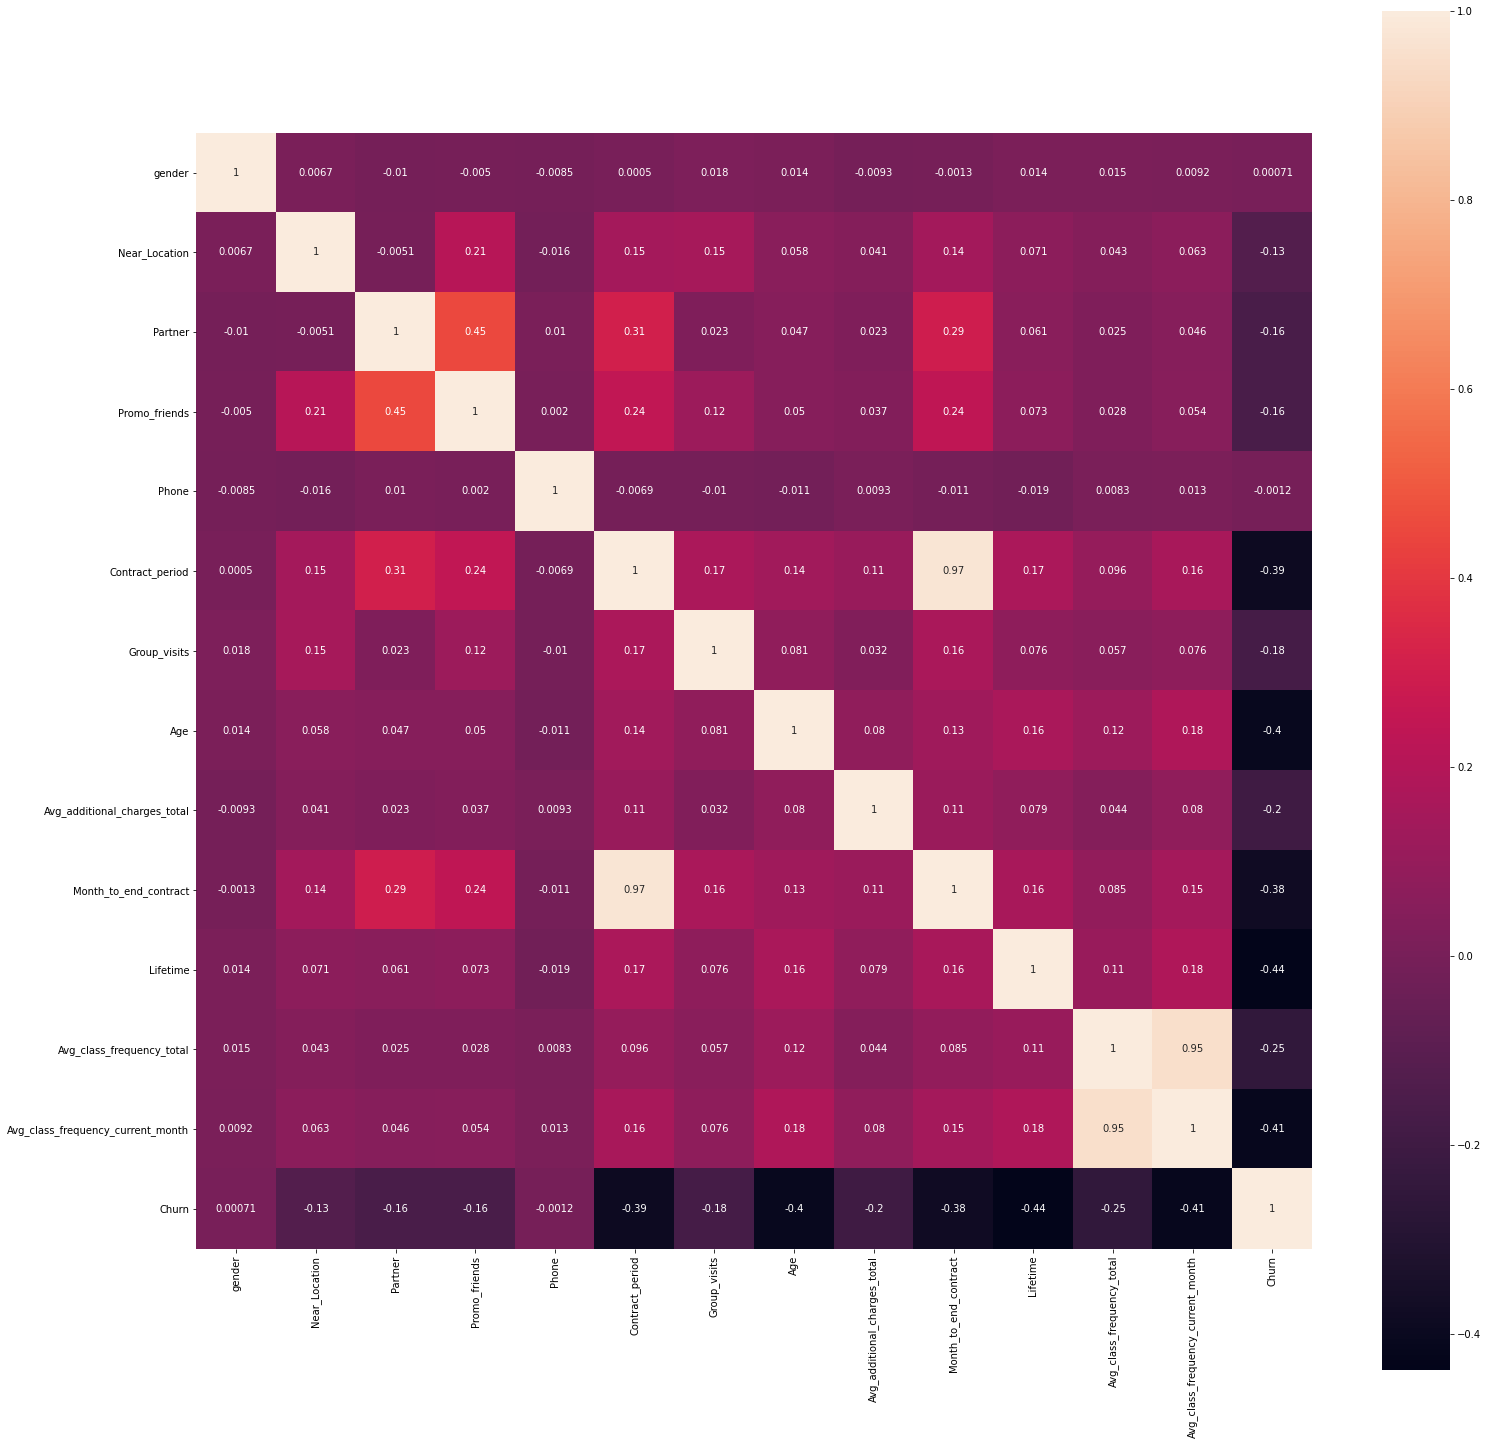

In [14]:
plt.figure(figsize = (25,25))
sns.heatmap(corr, square = True, annot = True)


#Не работает #ax.set_ylim(7, 0)  # корректировка "рваных" полей heatmap в последней версии библиотеки

plt.show()

### Вывод:


Перекосов по диаграмме рассеяния не наблюдается, значит на этих данных можно строить модель.

Можно предпложить, какие признаки влияют больше всего на целевую переменную. 

Это:

- Contract_period
- Age
- Month_to_end_contract
- Lifetime
- Avg_class_frequency_current_month

##  Построим модель прогнозирования оттока клиентов

Целевой признак — факт оттока клиента в следующем месяце

Разобьём данные на обучающую и валидационную выборку функцией train_test_split()

Обучим модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом

In [15]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis = 1)

y = data['Churn']

In [16]:
# разделим модель на обучающую и валидационную выборку
#Не забудем указать параметр random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 

Сравните по ним модели.

Посмотрим какая модель показала себя лучше на основании метрик.


In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [18]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

# обучим модель
lr_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [19]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:',
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


### Вывод:

Лучше всего себя показали метрики для модели логистической регрессии.
- Accuracy: 0.92
- Precision: 0.85
- Recall: 0.83

Метрики случайного леса Precision и Recall отсают на пару пунктов.
- Accuracy: 0.92
- Precision: 0.84
- Recall: 0.81

## Сделаем кластеризацию клиентов

Стандартизируем данные.

Постройим матрицу расстояний функцией linkage()

In [20]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

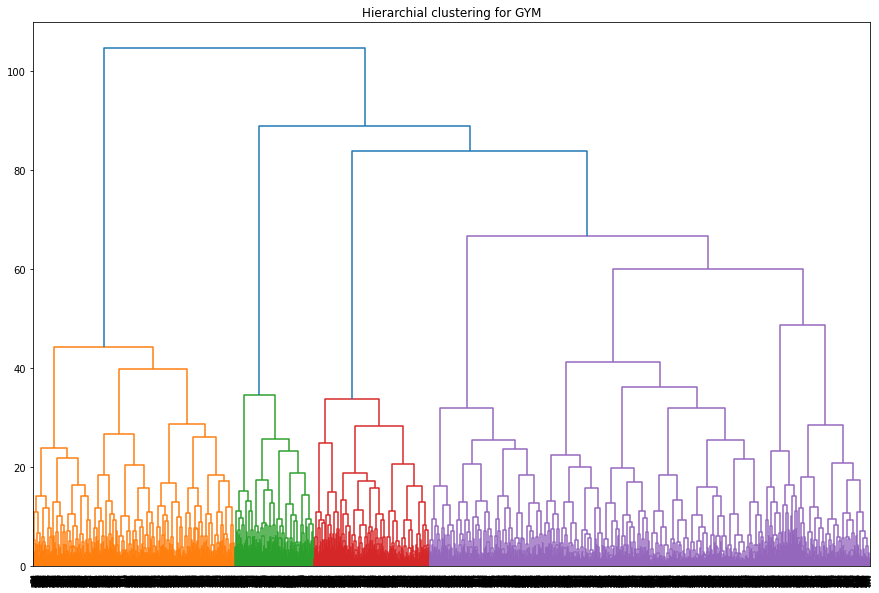

In [21]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Предложительно оптимальное число кластеров 4 — четыре разных цветов на графике.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 

In [22]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state

km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)

labels = km.fit_predict(X_sc)

In [23]:
# сохраняем метки кластера в поле датасета

data['cluster_km'] = labels

In [24]:
# выводим статистику по средним значениям признаков по кластеру

clusters = data.groupby(['cluster_km']).mean()
clusters

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Надёжные кластеры это - 0 и 4, тут меньше всего факт оттока

Ненаадежныё кластеры -  1, 2, 3 

Надёжные кластеры:

0 кластер: Пришли по партнёрской программе, по акции "приведи друга", у них большая длительность текущая длительность абонемента, ходят два раза в неделю 


4 кластер:  Ходят с среднем около 3 раз в неделю


Обои живут поблизости района, оставили контактный телефон, в большей степени ходят на групповые занятия, чем "ненажёжные кластеры", они оставляют деньги на другие услуги фитнес-центра


Все 3 ненадёжных кластера в среднем ходили меньше двух раз в неделю, брали абонемент до полугода, не ходили на групповые занятия. 

В 1 кластере вообще не оставляли контактный телефон. Они в меньшей степени участвовали в акции "приведи друга". 

2 кластер вообще не живёт\работает по близости района.



In [25]:
# определим функцию отрисовки графиков попарных признаков для кластеров

def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (5,5))
    sns.scatterplot(x=df[x_name], y=df[y_name],
           hue=df[cluster_name], palette='Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

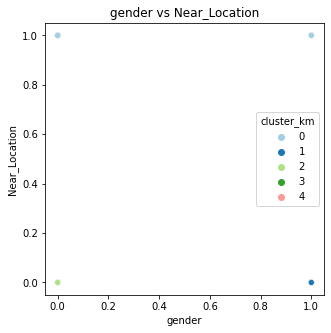

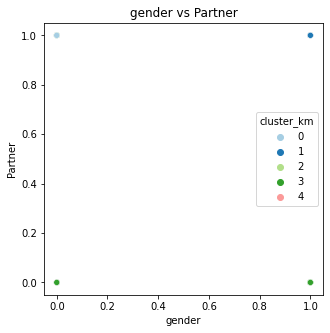

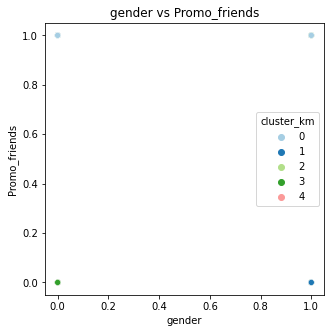

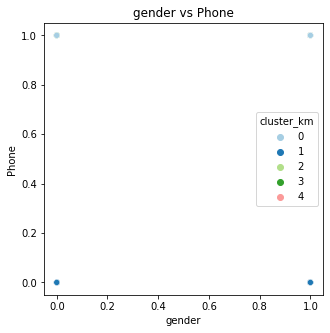

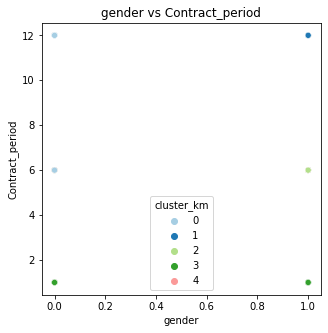

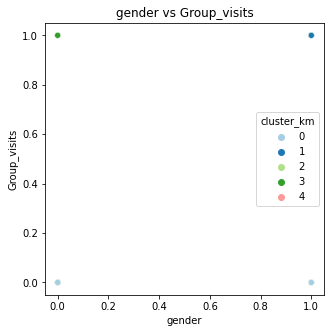

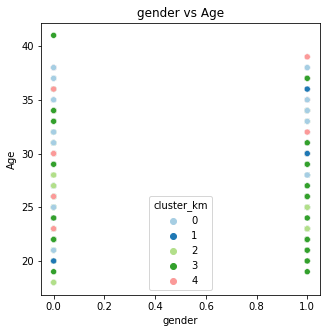

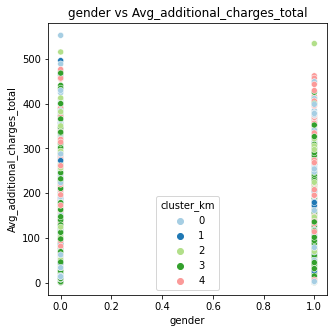

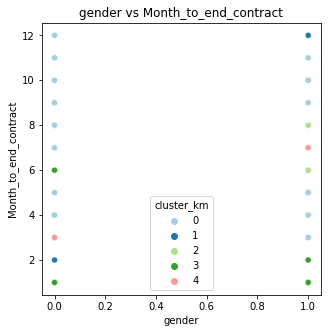

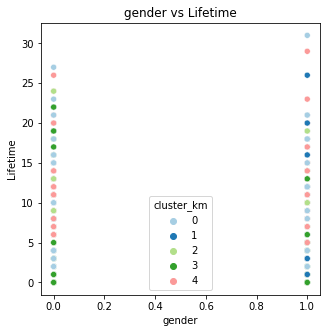

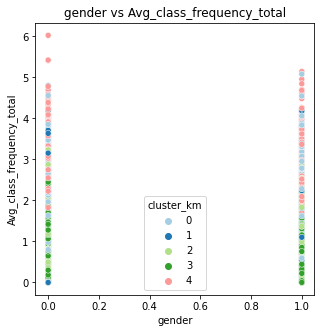

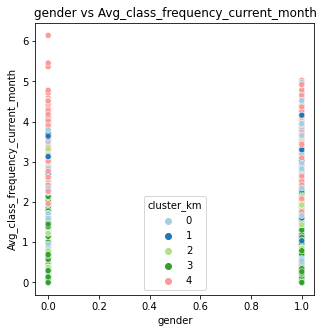

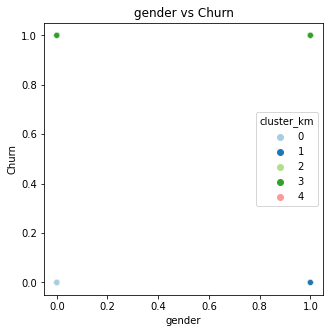

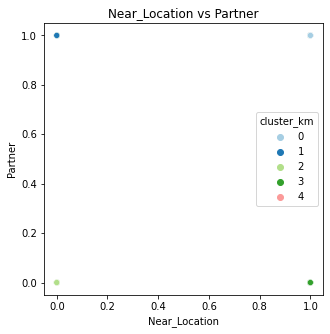

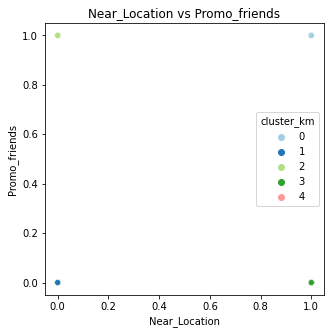

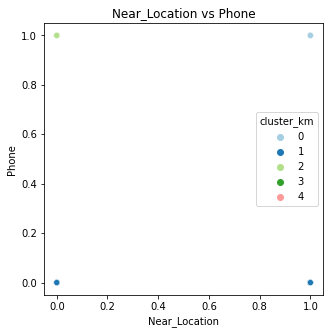

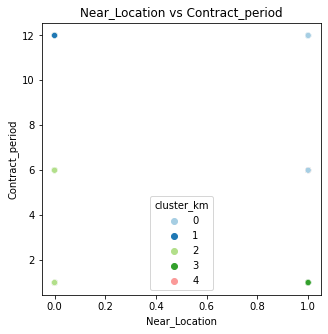

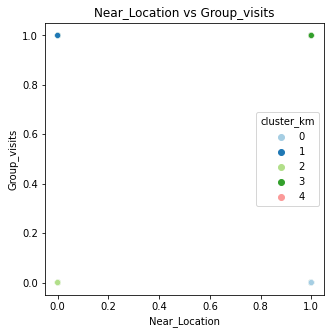

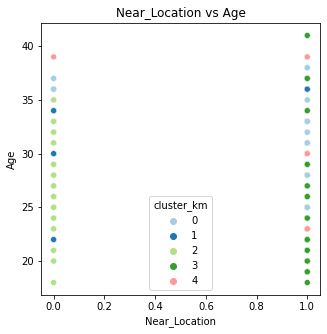

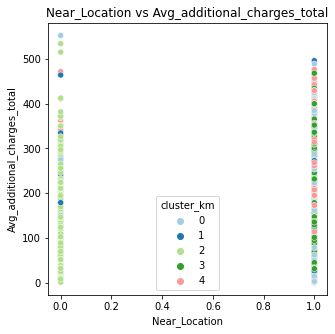

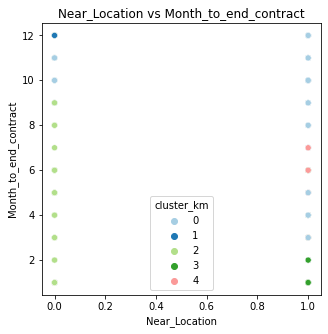

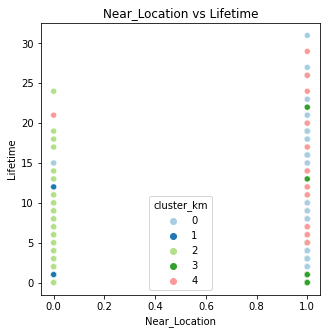

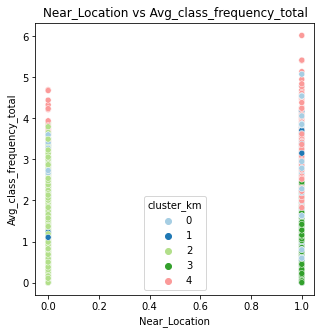

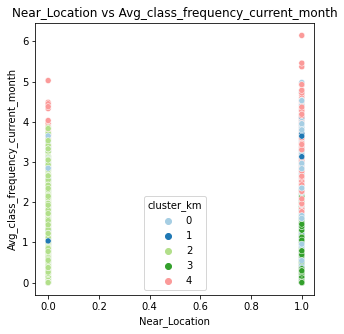

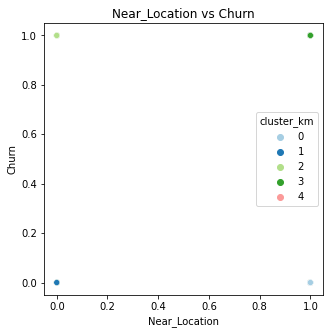

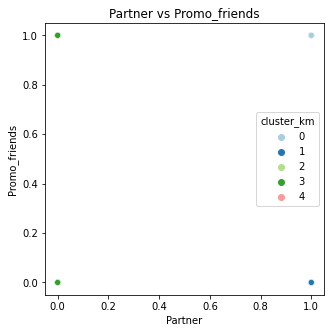

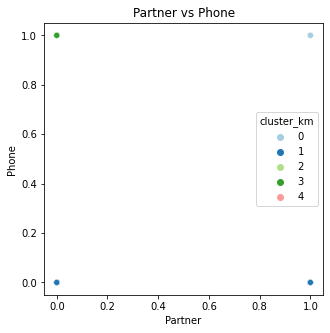

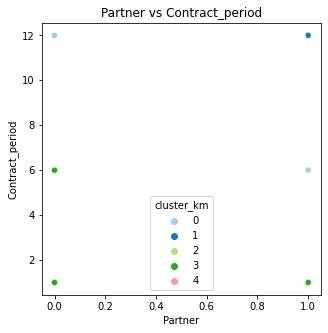

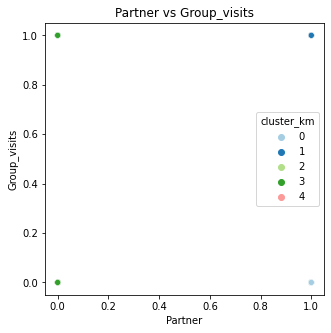

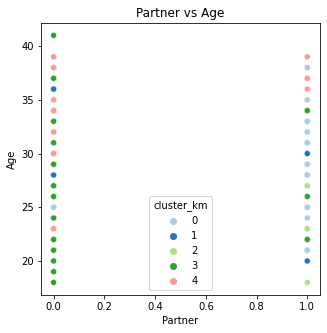

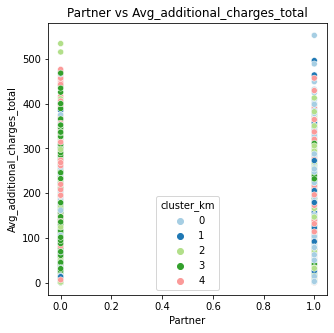

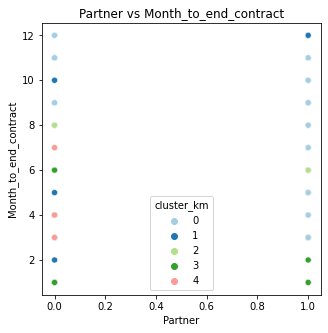

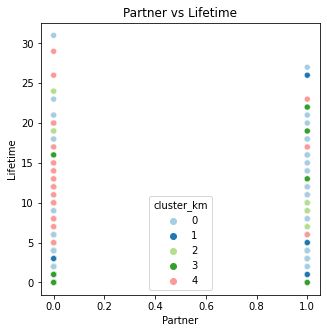

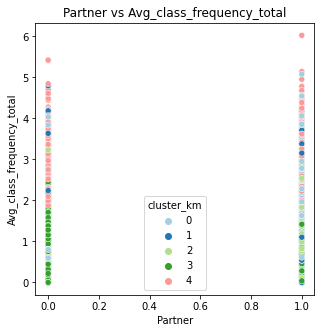

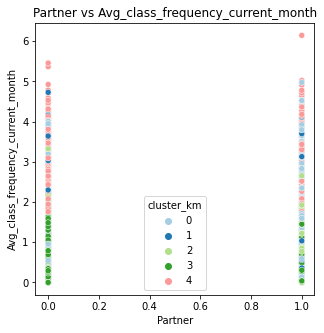

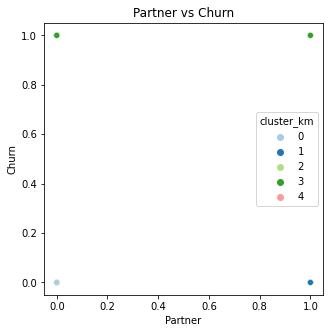

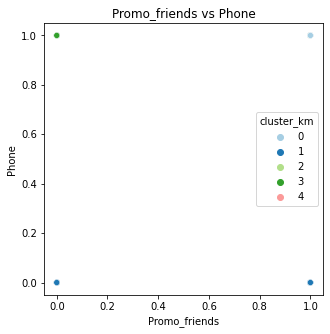

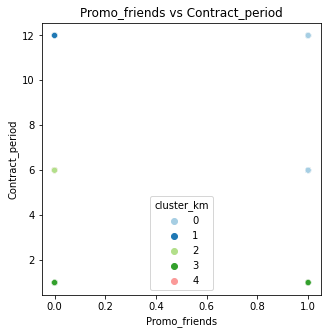

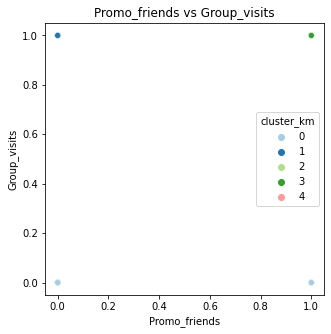

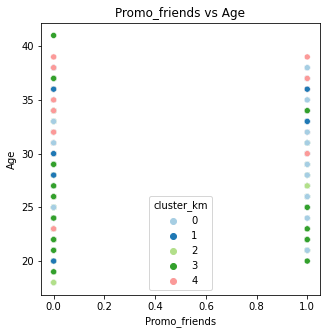

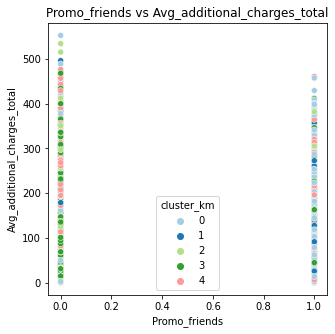

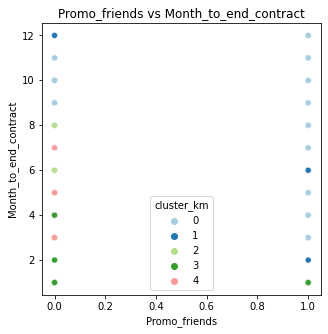

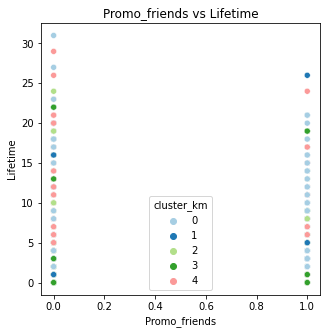

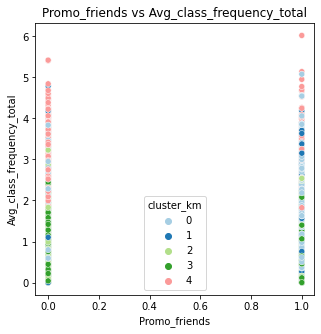

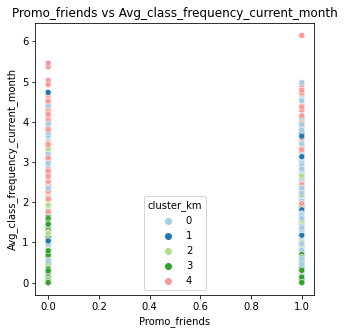

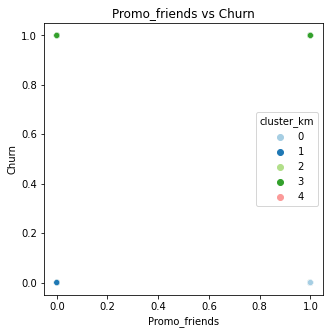

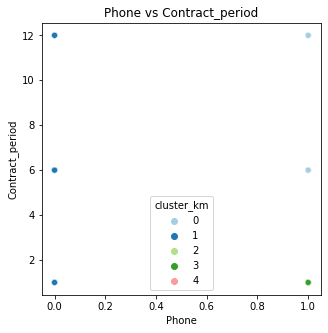

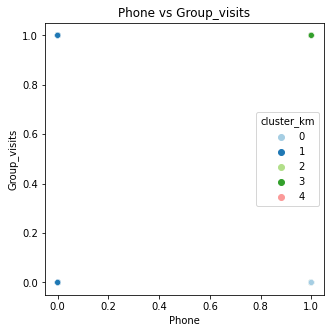

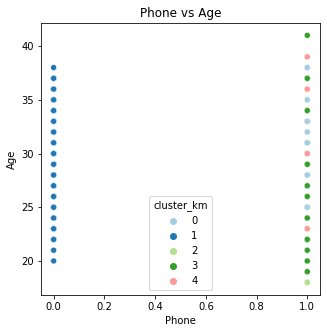

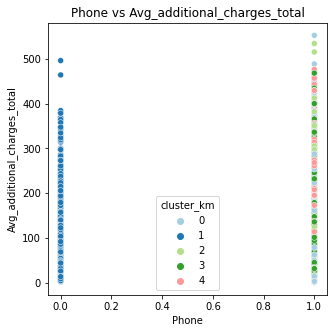

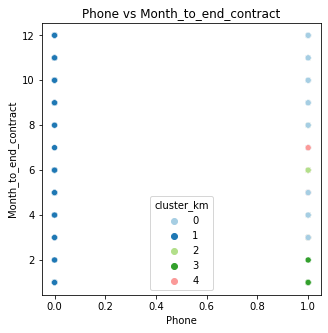

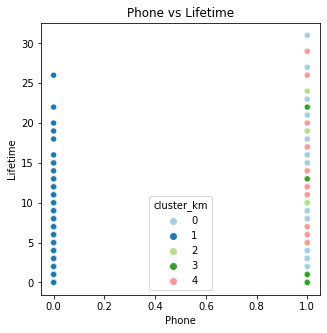

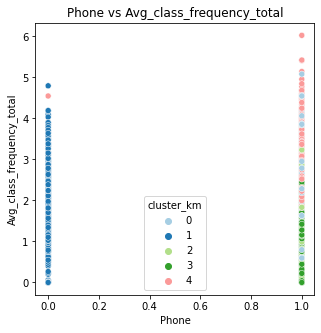

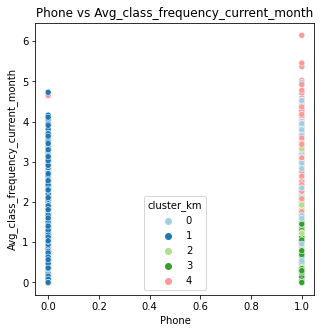

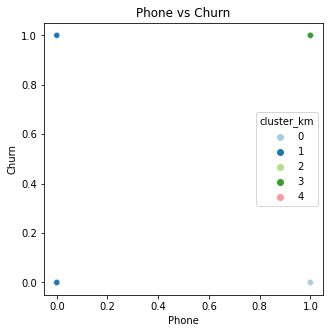

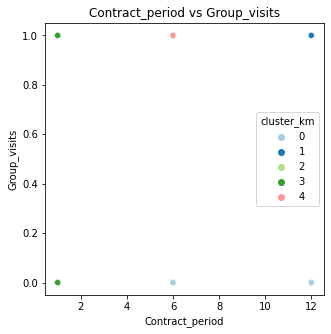

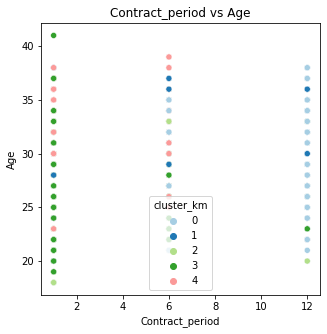

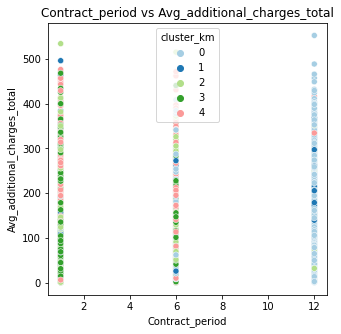

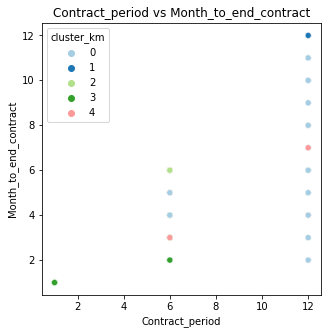

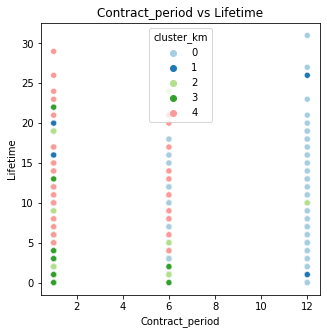

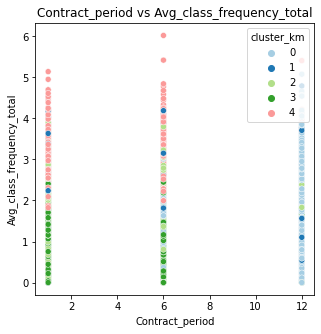

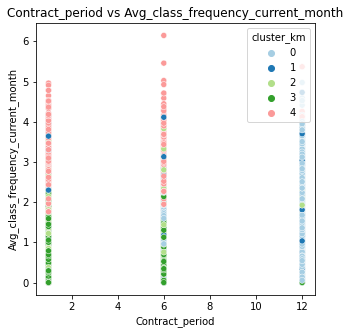

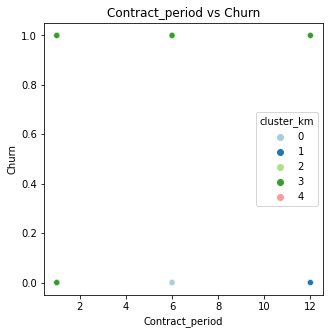

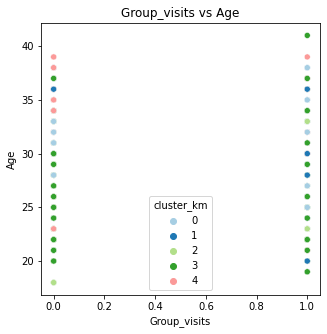

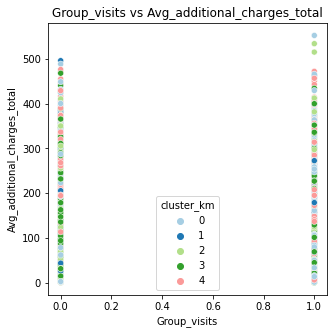

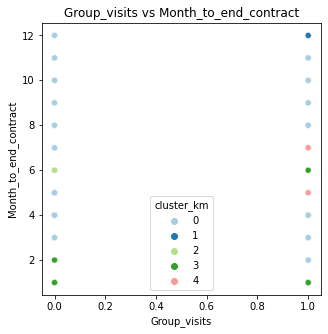

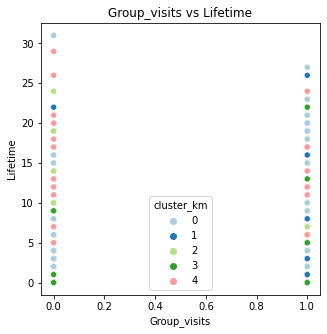

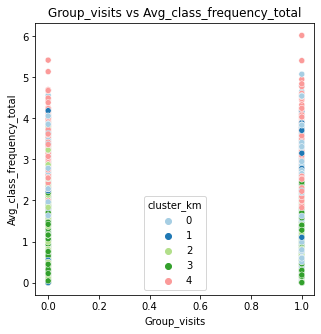

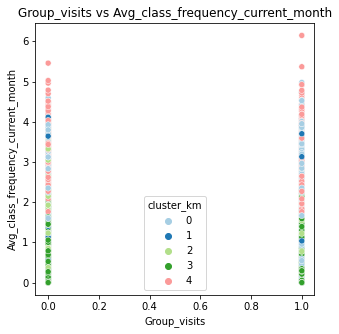

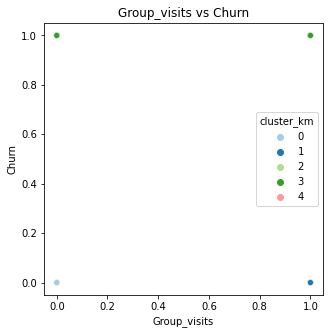

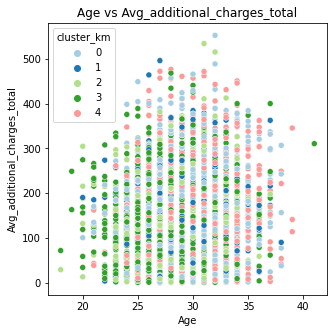

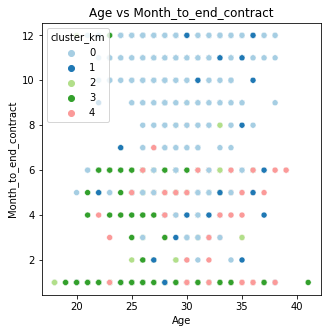

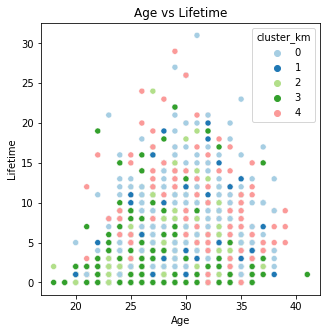

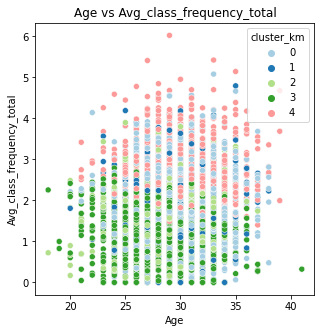

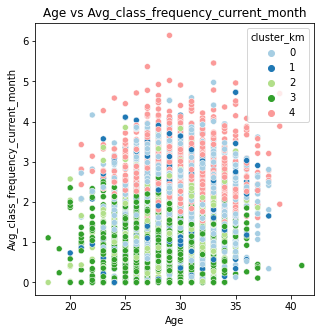

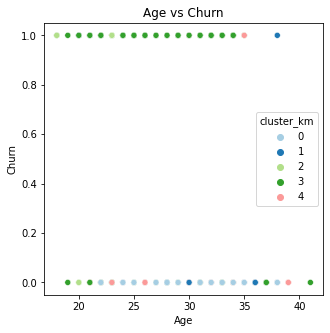

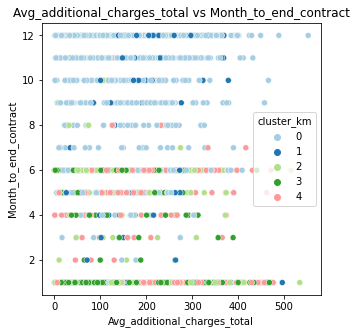

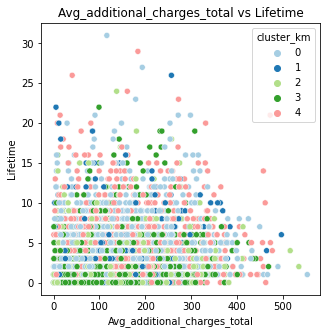

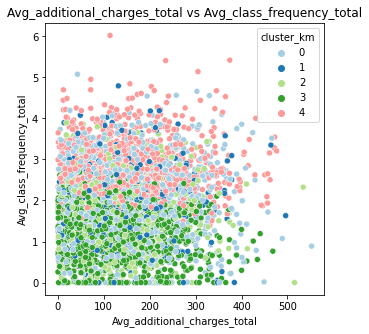

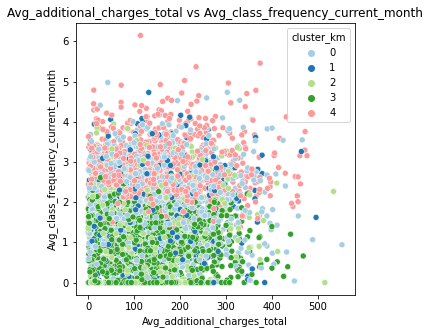

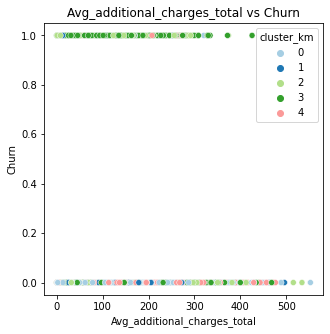

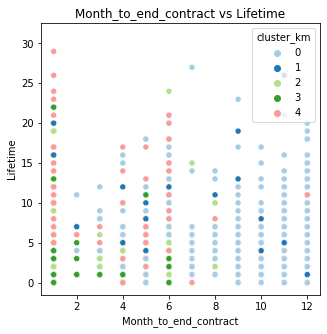

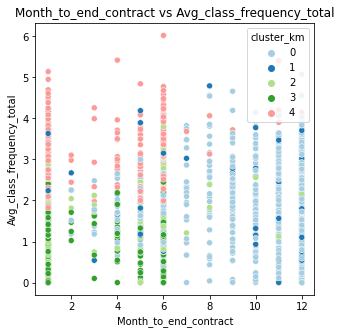

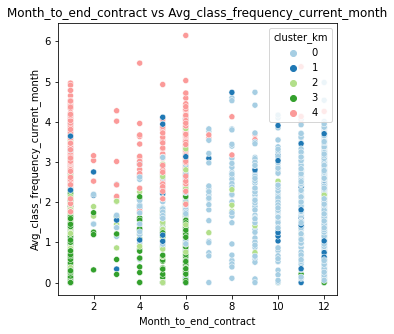

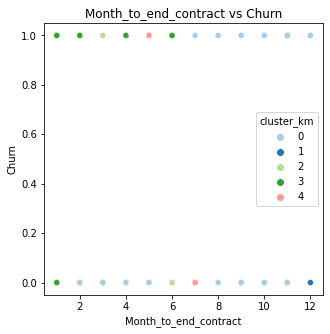

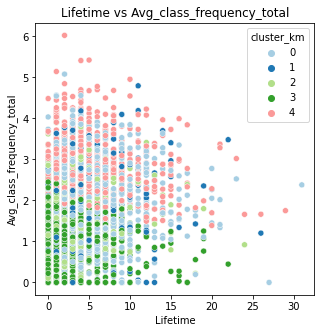

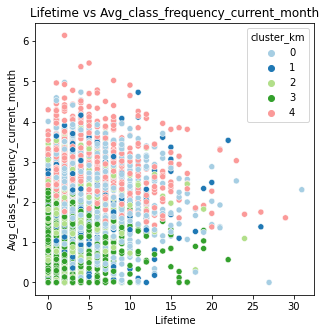

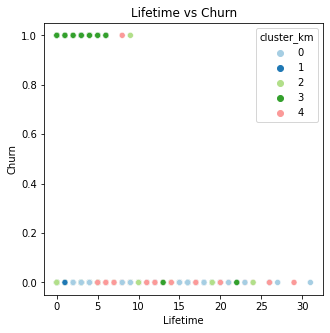

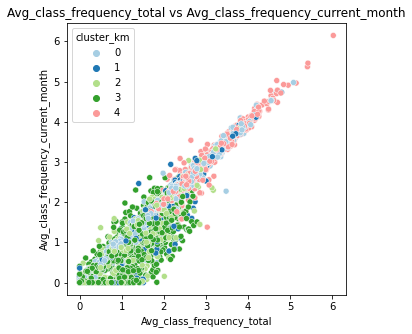

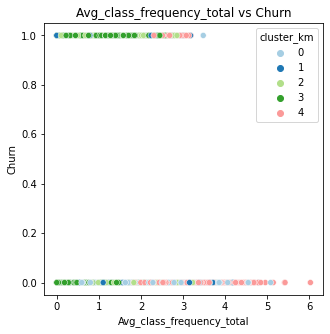

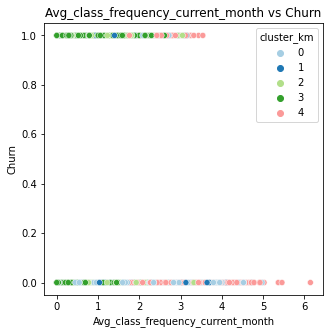

In [26]:
col_pairs = list(itertools.combinations(data.drop('cluster_km', axis=1).columns, 2))

for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster_km')

In [27]:
data.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

### Вывод:

###### Надёжные кластеры
Факт оттока:

0 кластер - 0.02

4 кластер - 0.06

Ненаадежныё кластеры:

1 кластер - 0.26

2 кластер - 0.44

3 кластер - 0.51

###### Ненадёжные кластеры:

0 кластер: Пришли по партнёрской программе, по акции "приведи друга", у них большая длительность текущая длительность абонемента, ходят два раза в неделю

4 кластер: Ходят с среднем около 3 раз в неделю

Обои живут поблизости района, оставили контактный телефон, в большей степени ходят на групповые занятия, чем "ненажёжные кластеры", они оставляют деньги на другие услуги фитнес-центра

Все 3 ненадёжных кластера в среднем ходили меньше двух раз в неделю, брали абонемент до полугода, не ходили на групповые занятия.

В 1 кластере вообще не оставляли контактный телефон. Они в меньшей степени участвовали в акции "приведи друга".

2 кластер вообще не живёт\работает по близости района.

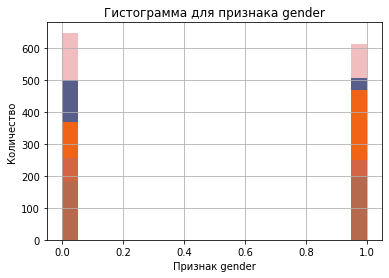

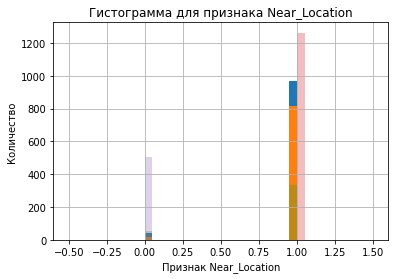

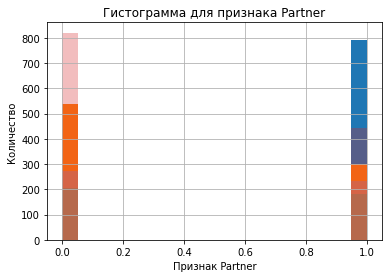

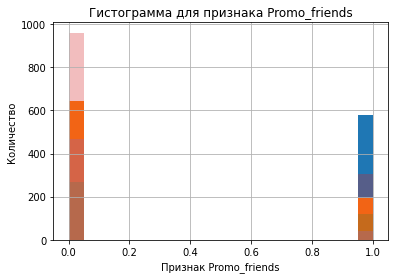

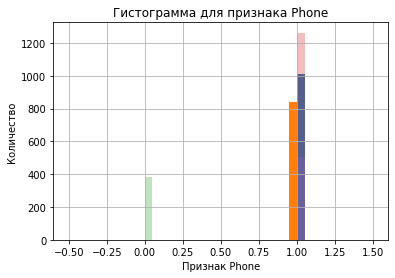

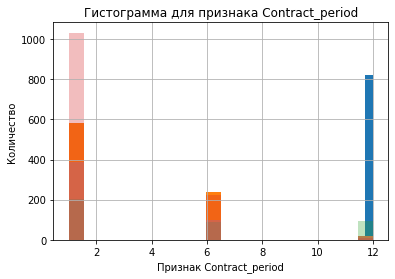

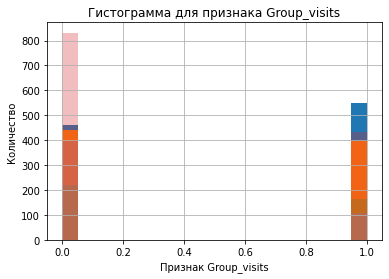

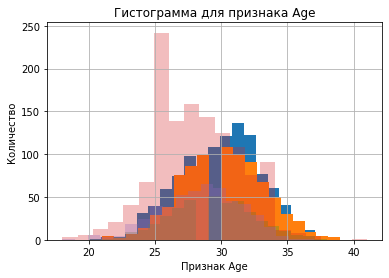

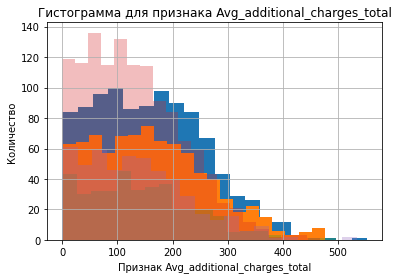

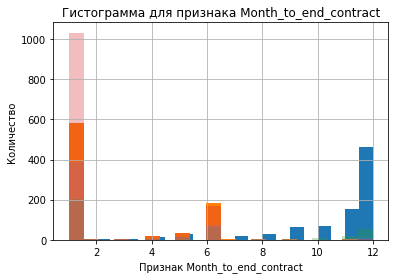

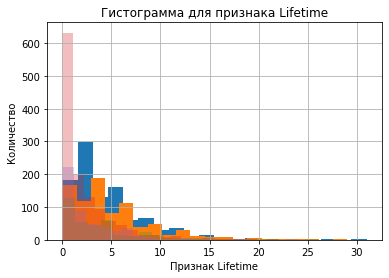

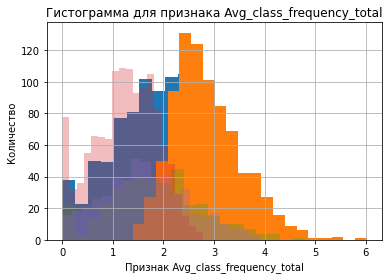

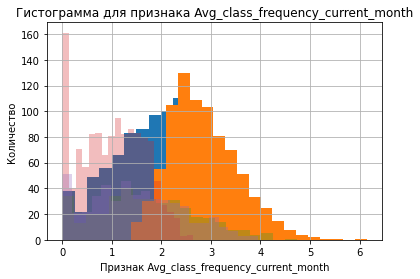

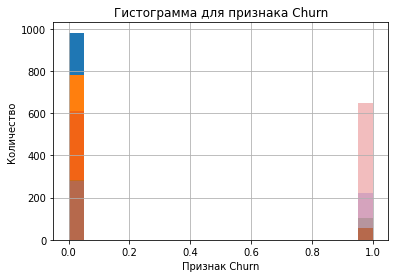

In [28]:
for col in data.drop('cluster_km', axis=1).columns:
    data.query('cluster_km == 0')[col].hist(label = '0', bins = 20)
    data.query('cluster_km == 4')[col].hist(label = '4', bins = 20)
    data.query('cluster_km == 1')[col].hist(label = '1', bins = 20, alpha = 0.3)
    data.query('cluster_km == 3')[col].hist(label = '3', bins = 20, alpha = 0.3)
    ax = data.query('cluster_km == 2')[col].hist( label = '2',bins = 20, alpha = 0.3)
    plt.title(f'Гистограмма для признака {col}')
    plt.xlabel(f'Признак {col}')
    plt.ylabel('Количество')
    plt.show()

## Сформулируем выводы и сделайте базовые рекомендации по работе с клиентами

### Вывод:

###### Определили надёжные и ненадёжные кластеры.

###### В связи с учётом особенностей ненадёжных кластеров, можно выделить следующие признаки:

- не оставляли контактный телефон
- не живёт\работает по близости района
- в меньшей степени участвовали в акции "приведи друга"
- ходили меньше двух раз в неделю
- брали абонемент до полугода


###### Рекомендации: 

- Стараться делать всё для того, чтобы контактный номер клиента был в базе

Например скидка 5% за то, что оставил номер телефона

- работать с клиентами из "нашего" района

Настраивать более "детальный" таргет рекламы

- Большее вовлечение клиентов в акции фитнес-центра
- Большее вовлечение клиента в посещение фитнес-центра
- Большее вовлечение клиента в посещение групповых занятий

Снимать видео, вести группы, блоги в соцсетях повышая лояльность клиента. Доносить ценность клиенту, почему хорошо ходить в фитнес центр.
